In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
os.chdir('C:\\Users\\LENOVO\\Desktop\\VIT hack-a-thon\\chennai rainfall')

In [3]:
data_set = pd.read_csv('chennai_reservoir_levels.csv',parse_dates=['Date'], dayfirst=True)

In [4]:
df = data_set.copy()

In [5]:
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-01-02,3.9,0.0,268.0,0.0
2,2004-01-03,3.9,0.0,267.0,0.0
3,2004-01-04,3.9,0.0,267.0,0.0
4,2004-01-05,3.8,0.0,267.0,0.0


In [6]:
df.dtypes

Date               datetime64[ns]
POONDI                    float64
CHOLAVARAM                float64
REDHILLS                  float64
CHEMBARAMBAKKAM           float64
dtype: object

In [7]:
df.isna().sum()

Date               0
POONDI             0
CHOLAVARAM         0
REDHILLS           0
CHEMBARAMBAKKAM    0
dtype: int64

In [8]:
data = df[['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']]
data

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,3.9,0.0,268.0,0.0
1,3.9,0.0,268.0,0.0
2,3.9,0.0,267.0,0.0
3,3.9,0.0,267.0,0.0
4,3.8,0.0,267.0,0.0
...,...,...,...,...
6177,2814.0,403.0,2819.0,3120.0
6178,2848.0,465.0,2833.0,3120.0
6179,2902.0,504.0,2841.0,3123.0
6180,2873.0,547.0,2847.0,3125.0


In [9]:
data['TOTAL CAPACITY'] = df['POONDI']+df['CHOLAVARAM']+df['REDHILLS']+df['CHEMBARAMBAKKAM']
data.head()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,TOTAL CAPACITY
0,3.9,0.0,268.0,0.0,271.9
1,3.9,0.0,268.0,0.0,271.9
2,3.9,0.0,267.0,0.0,270.9
3,3.9,0.0,267.0,0.0,270.9
4,3.8,0.0,267.0,0.0,270.8


<AxesSubplot:>

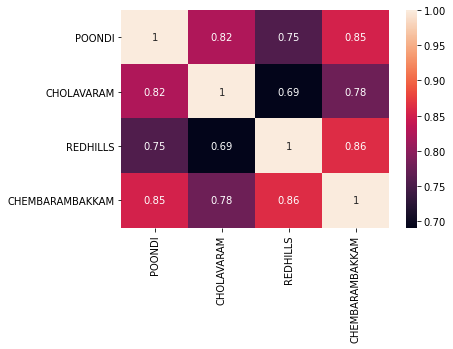

In [10]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

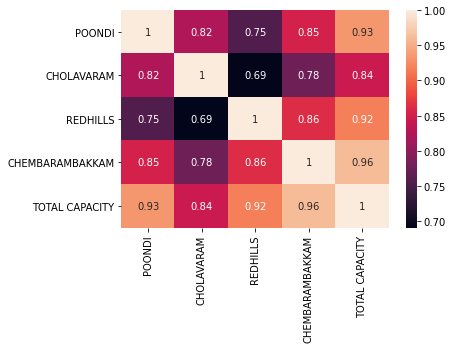

In [11]:
sns.heatmap(data.corr(), annot=True)

In [12]:
data['CHEMBARAMBAKKAM'] = data['CHEMBARAMBAKKAM'].astype(np.int64)

In [13]:
data['CHOLAVARAM'] = data['CHOLAVARAM'].astype(np.int64)

In [14]:
data['POONDI'] = data['POONDI'].astype(np.int64)

In [15]:
data['REDHILLS'] = data['REDHILLS'].astype(np.int64)

In [16]:
data['CHEMBARAMBAKKAM'].sort_values()

0          0
288        0
287        0
286        0
285        0
        ... 
4368    3215
4344    3223
4345    3223
4341    3268
4353    3396
Name: CHEMBARAMBAKKAM, Length: 6182, dtype: int64

In [17]:
data['CHEMBARAMBAKKAM'] = data['CHEMBARAMBAKKAM'].replace(0, 1)

In [18]:
data['CHOLAVARAM'] = data['CHOLAVARAM'].replace(0, 1)

In [19]:
data['TOTAL CAPACITY'] = data['TOTAL CAPACITY'].astype(np.int64)

In [20]:
data['POONDI'] = data['POONDI'].replace(0, 1)

In [21]:
data['REDHILLS'] = data['REDHILLS'].replace(0, 1)

In [22]:
X = data.drop(['TOTAL CAPACITY'], axis='columns', inplace=False)
Y = data['TOTAL CAPACITY']

In [23]:
X.shape, Y.shape

((6182, 4), (6182,))

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [26]:
from sklearn import linear_model

In [27]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [28]:
lm.coef_

array([1.00003624, 0.99964636, 1.00038567, 1.00008111])

In [29]:
lm.intercept_

-0.9606588689102864

In [30]:
y_fit = lm.predict(X_train)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [32]:
r2_train = r2_score(y_train, y_fit)
r2_train

0.9999999659399244

In [33]:
y_pred_all = lm.predict(X)

In [34]:
Y[:10]

0    271
1    271
2    270
3    270
4    270
5    269
6    269
7    268
8    267
9    267
Name: TOTAL CAPACITY, dtype: int64

In [35]:
y_pred_all[:10]

array([272.14253591, 272.14253591, 271.14215024, 271.14215024,
       271.14215024, 270.14176457, 270.14176457, 269.14137891,
       268.14099324, 268.14099324])

In [36]:
df['CAPACITY PREDICTION'] = y_pred_all[:]
df[:10]

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,CAPACITY PREDICTION
0,2004-01-01,3.9,0.0,268.0,0.0,272.142536
1,2004-01-02,3.9,0.0,268.0,0.0,272.142536
2,2004-01-03,3.9,0.0,267.0,0.0,271.142150
3,2004-01-04,3.9,0.0,267.0,0.0,271.142150
4,2004-01-05,3.8,0.0,267.0,0.0,271.142150
5,2004-01-06,3.8,0.0,266.0,0.0,270.141765
6,2004-01-07,3.8,0.0,266.0,0.0,270.141765
7,2004-01-08,3.7,0.0,265.0,0.0,269.141379
8,2004-01-09,3.7,0.0,264.0,0.0,268.140993
9,2004-01-10,3.7,0.0,264.0,0.0,268.140993


In [37]:
df.to_csv('capacity_pred_of_lake.csv')

<AxesSubplot:xlabel='Date', ylabel='CAPACITY PREDICTION'>

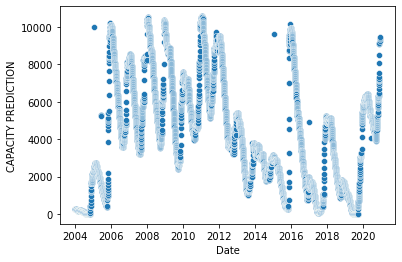

In [40]:
sns.scatterplot(y=df['CAPACITY PREDICTION'], x=df['Date'])